In [1]:
import TransitSimulator
import RVSimulator
import numpy as np

ModuleNotFoundError: No module named 'TransitSimulator'

In [14]:
### Definition of parameters (Here you can play around!)

# Planetary Parameters

pl_name = 'WASP-121b'
pl_mass = 1.183                  # planetary mass in Jupiter masses
pl_radius = 1.865                # planetary radius in Jupiter radii

# Orbital parameters

pl_period = 3.34                 # period in days
pl_semi = 0.0558                 # semi-major axis of the planet - star system in AU
ecc = 0                          # eccentricity of the orbit, ecc is between 0 and 1
incl = np.pi / 2.                # π / 2 = 90, seen edge on
long = 0                         # line of sight from the observer

# Stellar Parameters 
 
st_mass = 1.45                   # in solar masses
st_radius = 1.5                  # in solar radii
st_dist = 260.                   # in pc



##############################################################
# After changing parameters you have to re-run this cell.    #
# Otherwise the system is still based on the old parameters! #
##############################################################

pl_msini = pl_mass * np.sin(incl)

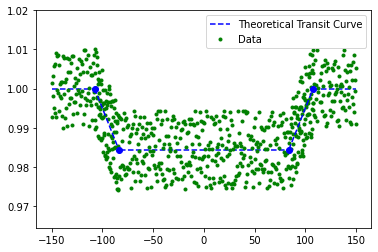

In [15]:
### Creating the system and plotting the transit. (Don't change anything here!)

sys1 = TransitSimulator.System(pl_name, pl_mass, pl_radius, pl_period, pl_semi, st_mass, st_radius, ecc, incl, long)
sys1.TransitParams()
sys1.Transit()

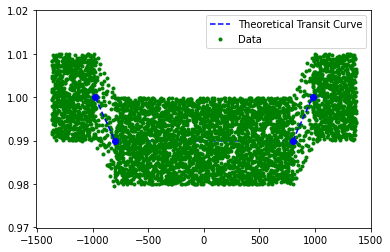

In [16]:
## The Jupiter-Sun System: 


# Planetary Parameters

pl_name = 'Jupiter'
pl_mass = 1.                     # planetary mass in Jupiter masses
pl_radius = 1.                   # planetary radius in Jupiter radii

# Orbital parameters

pl_period = 4332.59              # period in days
pl_semi = 5.2044                 # semi-major axis of the planet - star system in AU
ecc = 0.0489                     # eccentricity of the orbit, ecc is between 0 and 1
incl = np.pi / 2.                # π / 2 = 90, seen edge on
long = 0                         # line of sight from the observer

# Stellar Parameters 
 
st_mass = 1                      # in solar masses
st_radius = 1                    # in solar radii


### DON'T CHANGE ANYTHING BELOW THIS LINE ###

# Creating the system and plotting the transit. (Don't change anything here!)

sys2 = TransitSimulator.System(pl_name, pl_mass, pl_radius, pl_period, pl_semi, st_mass, st_radius, ecc, incl, long)
sys2.TransitParams()
sys2.Transit()

In [ ]:
### WANNA RUN SOMETHING YOURSELF?

# You can find the information about stars and planets here: http://exoplanet.eu/catalog/

# Planetary Parameters

pl_name = 'give it a name'
pl_mass =                        # planetary mass in Jupiter masses
pl_radius =                      # planetary radius in Jupiter radii

# Orbital parameters

pl_period =                      # period in days
pl_semi =                        # semi-major axis of the planet - star system in AU
ecc =                            # eccentricity of the orbit, ecc is between 0 and 1

# Stellar Parameters 
 
st_mass =                        # in solar masses
st_radius =                      # in solar radii

In [ ]:
### Creating the radial velocity system

rv1 = RadialVelocity(pl_sem, pl_period, ecc, incl, longitude, pl_msini,st_mass, st_dist)
rv1.Kepler()
rv1.RadialVelocityCurve()